In [1]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("./insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.describe()

,age,bmi,charges,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,0.204783
std,14.049960,6.098187,12110.011237,0.403694
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,0.000000
75%,51.000000,34.693750,16639.912515,0.000000
max,64.000000,53.130000,63770.428010,1.000000


Checking if the data set has any NaN values in any column

In [11]:
df.isnull().sum().sum()

0

Convert categorical data into numeric

In [3]:
df = pd.get_dummies(
    data=df, columns=['smoker', 'sex', 'region'], drop_first=True)
df.head()


,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0


Find correlation between data to identify which columns affect charges

In [5]:
corr_matrix = df.corr()
corr_matrix

,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292,-0.039905,0.073982,-0.043210
smoker_yes,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185,-0.036945,0.068498,-0.036945
sex_male,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000,-0.011156,0.017117,-0.004184
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.036945,-0.011156,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.068498,0.017117,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.036945,-0.004184,-0.320829,-0.346265,1.000000


View correlation between charges and other columns

In [6]:
corr_matrix['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
smoker_yes          0.787251
sex_male            0.057292
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

To simplify the model, data with correlation absolute values less than 0.1 can be considered insignificant and so they can be dropped.



In [7]:
df.drop(['children', 'sex_male', 'region_northwest',
        'region_southeast', 'region_southwest'], axis=1, inplace=True)


In [8]:
df.head()

,age,bmi,charges,smoker_yes
0,19,27.900,16884.92400,1
1,18,33.770,1725.55230,0
2,28,33.000,4449.46200,0
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0


Linear regression model using scikit-learn

In [55]:
# function definition

def sklearn_linear_regression(X_train, y_train, X_test, y_test):

    line = linear_model.LinearRegression()
    line = line.fit(X_train, y_train)

    # Test the model using training dataset
    y_pred = line.predict(X_train)

    # Show real vs predicted results
    print('W: ', line.coef_)
    print('b: ', line.intercept_, '\n')
    print('Test:\n', X_test.head(), '\n\nPredicted:\n', line.predict(X_test), '\n')
    print('Real:\n', y_test, '\n')
    print("R^2-score:", r2_score(y_train, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_train, y_pred))

    # Plot the results
    plt.scatter(y_train, y_pred)
    plt.xlabel('Real Charges')
    plt.ylabel('Predicted Charges')
    plt.title('Linear regression using Scikit-learn')
    plt.show()


Randomly splitting the dataset into a training set and a testing set

In [56]:
train , test = np.split(df.sample(frac=1), [int(0.8*len(df))])
print("test set:")
print(test.describe())
print()
print("train set:")
print(train.describe())

test set:
              age         bmi       charges  smoker_yes
count  268.000000  268.000000    268.000000  268.000000
mean    38.272388   30.711959  12920.780513    0.194030
std     14.083102    6.203003  12235.333951    0.396192
min     18.000000   17.290000   1136.399400    0.000000
25%     26.000000   26.125000   4440.475712    0.000000
50%     37.000000   30.400000   9023.444525    0.000000
75%     51.000000   34.816250  16110.025312    0.000000
max     64.000000   52.580000  52590.829390    1.000000

train set:
               age          bmi       charges   smoker_yes
count  1070.000000  1070.000000   1070.000000  1070.000000
mean     39.441121    30.651234  13357.996087     0.207477
std      14.038494     6.074528  12082.598708     0.405689
min      18.000000    15.960000   1121.873900     0.000000
25%      27.000000    26.336250   4854.685375     0.000000
50%      40.000000    30.300000   9467.513300     0.000000
75%      51.000000    34.580000  16862.795985     0.000000
ma

W:  [  258.9764019    316.48542557 23911.37987892]
b:  -11518.045016491247 

Test:
      age     bmi  smoker_yes
947   37  34.200           1
451   30  24.130           0
742   53  34.105           1
31    18  26.315           0
918   61  28.200           0 

Predicted:
 [3.27992633e+04 3.88804036e+03 3.69128196e+04 1.47184419e+03
 1.32044045e+04 1.53323549e+04 1.14952667e+04 9.30510252e+03
 3.30037573e+03 2.38269554e+03 1.51291775e+04 4.63694250e+03
 7.95271149e+03 1.11612895e+04 4.68458537e+03 3.76788419e+04
 3.37101146e+04 5.04696118e+03 3.43218447e+04 7.22679154e+03
 6.03435319e+03 1.48560018e+04 3.73783732e+03 5.58294736e+03
 5.25859231e+03 3.24542010e+02 1.49995035e+04 2.25269431e+04
 1.70740230e+04 3.64875183e+04 4.04012342e+03 8.81717332e+03
 9.71807349e+03 2.94162041e+04 2.64696087e+03 8.62615626e+03
 1.45368507e+04 2.50092096e+03 2.77119726e+04 3.61580869e+04
 1.45747481e+03 5.81389669e+03 2.76490897e+04 1.41171196e+03
 6.88232156e+03 6.77846553e+03 3.18795440e+04 1.49969654e

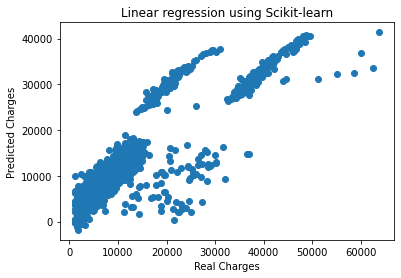

In [57]:
sklearn_linear_regression(
    train[["age", "bmi", "smoker_yes"]], train["charges"], test[["age", "bmi", "smoker_yes"]], test["charges"])


Linear regression model using Python from scratch implemention

In [37]:
# Calculate mean and standard deviation of X
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std


In [38]:
# Use the input training data and the learning rate alpha, with number of iterations T
def lin_regression(X, y, T, alpha):
    num_samples, num_features = X.shape

    # Initialize w and b values
    w = np.zeros((num_features, 1))
    b = 0

    # Find the gradients gW and gb
    for i in range(T):
        # Calculate predictions
        y_predict = np.dot(X, w) + b
        # Calculate gradients
        gw = np.dot(X.T, (y_predict - y)) / num_samples
        gb = np.sum(y_predict - y) / num_samples
        # Update model parameters
        w = w - alpha * gw.reshape(-1, 1)
        b = b - alpha * gb
    
    # Final solution
    y_predict = np.dot(X, w) + b
    return w, b, y_predict

In [43]:
X = df[['age','bmi','smoker_yes']]
y = df[['charges']]

X_norm, X_mean, X_std = normalize(X.values)
y_norm, y_mean, y_std = normalize(y.values.reshape(-1, 1))

alpha = 0.01 
T = 500

w, b, y_predict = lin_regression(X_norm, y_norm, T, alpha)
mse = np.mean(np.square(y_norm - y_predict))

# Denormalize the predicted and the real charges
y_predict_denorm = (y_predict * y_std) + y_mean.flatten()
y_denorm = (y_norm * y_std) + y_mean.flatten()

print("w:", w)
print("b:", b)
print("Mean Squared Error:", mse)

w: [[0.29872034]
 [0.16266732]
 [0.78869716]]
b: -2.721457007597603e-17
Mean Squared Error: 0.2525579082222526


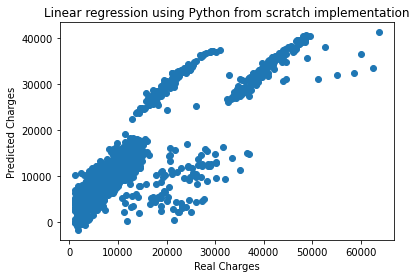

In [58]:
# Plot the results
plt.scatter(y_denorm, y_predict_denorm)
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear regression using Python from scratch implementation')
plt.show()


Due to its built-in features, the Scikit-learn technique can be implemented considerably more quickly, simply, and easily.
The Python implementation from scratch, however, gives the user more control and a better knowledge of the underlying mathematical concepts.